here we will cluster the embeddings to see if there is any similarities between them

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

## Read deepwalk 64 embedding

In [3]:
vecsize = 64
idx = 0

In [4]:
features = pd.read_csv(
    "data/min_hetionet/test/embedding_{}_{}.txt".format(vecsize, idx),
    sep=" ", skiprows=1,
    names=["uid"] + ["f{}".format(i) for i in range(vecsize)]
)

In [5]:
features.shape

(7927, 65)

In [6]:
features.head()

,uid,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63
0,7324,0.424142,2.057529,2.150354,-1.964922,-0.957505,5.427593,-2.124011,-5.059958,4.391842,...,-6.505708,-1.930992,-0.213860,2.902412,-6.539911,-3.800288,2.269024,1.881055,5.683529,-0.839482
1,6959,0.960617,2.266797,2.294675,-3.552197,6.926412,-0.751194,-0.446336,-5.394247,0.258741,...,-4.399741,2.619867,-3.753803,-0.367113,-6.181104,-0.731330,5.883546,-2.194875,-3.054283,-4.622406
2,6410,4.730375,-1.576859,-2.161227,-3.447428,-5.780465,5.726500,-1.936984,-2.280269,1.794731,...,1.259608,-1.428305,1.736320,-0.445753,-3.646091,2.913816,-2.992223,-0.504564,1.245656,-8.235349
3,5929,-0.741860,-0.560861,5.339453,-0.595004,-2.708641,-1.778100,-4.780436,0.398455,-1.219101,...,-4.096083,-2.499942,-0.779885,0.202663,-0.462629,5.672264,1.017156,1.501361,1.662245,-8.636725
4,6305,1.299903,-1.940370,-2.188239,2.613826,1.144808,1.529212,4.657269,-3.104798,-2.172987,...,-7.022854,7.174292,-2.310328,4.432360,3.285754,3.411851,0.881052,-5.351818,4.123768,-4.677237


---

In [7]:
mtrx = features.drop("uid", axis=1)

In [8]:
mtrx.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63
0,0.424142,2.057529,2.150354,-1.964922,-0.957505,5.427593,-2.124011,-5.059958,4.391842,2.804703,...,-6.505708,-1.930992,-0.213860,2.902412,-6.539911,-3.800288,2.269024,1.881055,5.683529,-0.839482
1,0.960617,2.266797,2.294675,-3.552197,6.926412,-0.751194,-0.446336,-5.394247,0.258741,2.839302,...,-4.399741,2.619867,-3.753803,-0.367113,-6.181104,-0.731330,5.883546,-2.194875,-3.054283,-4.622406
2,4.730375,-1.576859,-2.161227,-3.447428,-5.780465,5.726500,-1.936984,-2.280269,1.794731,0.180242,...,1.259608,-1.428305,1.736320,-0.445753,-3.646091,2.913816,-2.992223,-0.504564,1.245656,-8.235349
3,-0.741860,-0.560861,5.339453,-0.595004,-2.708641,-1.778100,-4.780436,0.398455,-1.219101,-1.531608,...,-4.096083,-2.499942,-0.779885,0.202663,-0.462629,5.672264,1.017156,1.501361,1.662245,-8.636725
4,1.299903,-1.940370,-2.188239,2.613826,1.144808,1.529212,4.657269,-3.104798,-2.172987,-2.745302,...,-7.022854,7.174292,-2.310328,4.432360,3.285754,3.411851,0.881052,-5.351818,4.123768,-4.677237


In [9]:
num_groups = 8

In [10]:
cluster = KMeans(n_clusters=num_groups).fit_predict(mtrx)

In [11]:
cluster

array([6, 6, 6, ..., 0, 0, 0], dtype=int32)

---

In [12]:
res = pd.concat(
    [pd.Series(cluster).to_frame("cluster"), features], axis=1
)

In [13]:
res.shape

(7927, 66)

In [14]:
res.head()

,cluster,uid,f0,f1,f2,f3,f4,f5,f6,f7,...,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63
0,6,7324,0.424142,2.057529,2.150354,-1.964922,-0.957505,5.427593,-2.124011,-5.059958,...,-6.505708,-1.930992,-0.213860,2.902412,-6.539911,-3.800288,2.269024,1.881055,5.683529,-0.839482
1,6,6959,0.960617,2.266797,2.294675,-3.552197,6.926412,-0.751194,-0.446336,-5.394247,...,-4.399741,2.619867,-3.753803,-0.367113,-6.181104,-0.731330,5.883546,-2.194875,-3.054283,-4.622406
2,6,6410,4.730375,-1.576859,-2.161227,-3.447428,-5.780465,5.726500,-1.936984,-2.280269,...,1.259608,-1.428305,1.736320,-0.445753,-3.646091,2.913816,-2.992223,-0.504564,1.245656,-8.235349
3,6,5929,-0.741860,-0.560861,5.339453,-0.595004,-2.708641,-1.778100,-4.780436,0.398455,...,-4.096083,-2.499942,-0.779885,0.202663,-0.462629,5.672264,1.017156,1.501361,1.662245,-8.636725
4,7,6305,1.299903,-1.940370,-2.188239,2.613826,1.144808,1.529212,4.657269,-3.104798,...,-7.022854,7.174292,-2.310328,4.432360,3.285754,3.411851,0.881052,-5.351818,4.123768,-4.677237


---

In [15]:
nodes = pd.read_csv("data/min_hetionet/minhet_nodes.tsv", sep='\t')

In [16]:
nodes.head()

,node_uid,node_id,name,het_type
0,0,10,NAT2,Gene
1,1,100,ADA,Gene
2,2,10000,AKT3,Gene
3,3,10005,ACOT8,Gene
4,4,10007,GNPDA1,Gene


In [17]:
final = (res
    .rename(columns={"uid": "node_uid"})
    .merge(
        nodes.drop("node_id", axis=1),
        how="inner", on="node_uid"
    )
)

In [18]:
final.head()

,cluster,node_uid,f0,f1,f2,f3,f4,f5,f6,f7,...,f56,f57,f58,f59,f60,f61,f62,f63,name,het_type
0,6,7324,0.424142,2.057529,2.150354,-1.964922,-0.957505,5.427593,-2.124011,-5.059958,...,-0.213860,2.902412,-6.539911,-3.800288,2.269024,1.881055,5.683529,-0.839482,Crizotinib,Compound
1,6,6959,0.960617,2.266797,2.294675,-3.552197,6.926412,-0.751194,-0.446336,-5.394247,...,-3.753803,-0.367113,-6.181104,-0.731330,5.883546,-2.194875,-3.054283,-4.622406,Dasatinib,Compound
2,6,6410,4.730375,-1.576859,-2.161227,-3.447428,-5.780465,5.726500,-1.936984,-2.280269,...,1.736320,-0.445753,-3.646091,2.913816,-2.992223,-0.504564,1.245656,-8.235349,Thioridazine,Compound
3,6,5929,-0.741860,-0.560861,5.339453,-0.595004,-2.708641,-1.778100,-4.780436,0.398455,...,-0.779885,0.202663,-0.462629,5.672264,1.017156,1.501361,1.662245,-8.636725,Menadione,Compound
4,7,6305,1.299903,-1.940370,-2.188239,2.613826,1.144808,1.529212,4.657269,-3.104798,...,-2.310328,4.432360,3.285754,3.411851,0.881052,-5.351818,4.123768,-4.677237,Vinblastine,Compound


In [19]:
tmp = final[["cluster", "node_uid", "name", "het_type"]]

In [20]:
tmp.head()

,cluster,node_uid,name,het_type
0,6,7324,Crizotinib,Compound
1,6,6959,Dasatinib,Compound
2,6,6410,Thioridazine,Compound
3,6,5929,Menadione,Compound
4,7,6305,Vinblastine,Compound


In [21]:
tmp.groupby("cluster")["het_type"].value_counts()

cluster  het_type
0        Gene        3369
         Compound     490
         Anatomy      161
1        Gene         620
         Compound       7
2        Compound     721
         Gene         104
3        Gene         671
4        Gene         672
         Compound       8
5        Anatomy      237
         Disease      133
         Compound       6
         Gene           1
6        Compound     289
7        Gene         435
         Compound       3
Name: het_type, dtype: int64

---

In [23]:
pca = PCA(2)

In [24]:
projected = pca.fit_transform(features.drop("uid", axis=1))

In [25]:
projected.shape

(7927, 2)

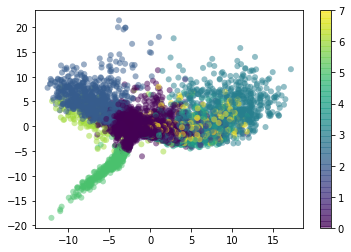

In [26]:
plt.scatter(
    projected[:, 0], projected[:, 1],
    c=cluster, edgecolor='none', alpha=0.5
)

plt.colorbar()

In [29]:
tmp.head()

,cluster,node_uid,name,het_type
0,6,7324,Crizotinib,Compound
1,6,6959,Dasatinib,Compound
2,6,6410,Thioridazine,Compound
3,6,5929,Menadione,Compound
4,7,6305,Vinblastine,Compound


In [34]:
info = pd.concat(
    [
        pd.DataFrame(projected, columns=["pca0", "pca1"]),
        tmp
    ], axis=1
)

In [35]:
info.head()

,pca0,pca1,cluster,node_uid,name,het_type
0,3.607773,-1.805288,6,7324,Crizotinib,Compound
1,3.242395,-1.294174,6,6959,Dasatinib,Compound
2,0.928388,1.822031,6,6410,Thioridazine,Compound
3,2.434376,-0.102702,6,5929,Menadione,Compound
4,3.356995,-0.223157,7,6305,Vinblastine,Compound


In [36]:
a = info.query("pca0 < 0 and pca1 < 0")

In [37]:
a.head()

,pca0,pca1,cluster,node_uid,name,het_type
57,-0.274292,-1.816563,6,6335,Ivermectin,Compound
59,-0.209745,-1.605103,6,6114,Vinorelbine,Compound
61,-1.479809,-0.093936,6,5985,Lovastatin,Compound
65,-2.318916,-0.225241,6,6806,Fluvastatin,Compound
73,-0.735102,-0.685797,6,7043,Danazol,Compound


In [38]:
a["het_type"].value_counts()

Gene        2077
Anatomy      398
Compound     247
Disease      133
Name: het_type, dtype: int64

In [39]:
info.query("pca0 > 0 or pca1 > 0")["het_type"].value_counts()

Gene        3795
Compound    1277
Name: het_type, dtype: int64

---

In [40]:
info.head()

,pca0,pca1,cluster,node_uid,name,het_type
0,3.607773,-1.805288,6,7324,Crizotinib,Compound
1,3.242395,-1.294174,6,6959,Dasatinib,Compound
2,0.928388,1.822031,6,6410,Thioridazine,Compound
3,2.434376,-0.102702,6,5929,Menadione,Compound
4,3.356995,-0.223157,7,6305,Vinblastine,Compound


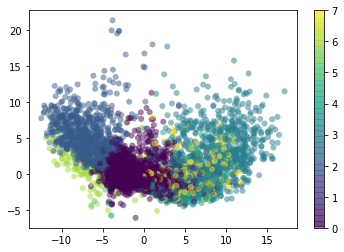

In [42]:
small = info.query("het_type == 'Gene' or het_type == 'Compound'")

plt.scatter(
    small["pca0"], small["pca1"],
    c=small["cluster"], edgecolor='none', alpha=0.5
)

plt.colorbar()

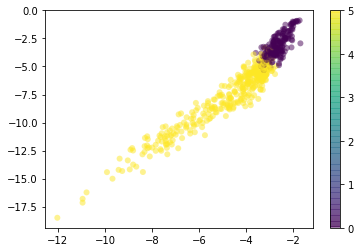

In [43]:
small = info.query("het_type == 'Disease' or het_type == 'Anatomy'")

plt.scatter(
    small["pca0"], small["pca1"],
    c=small["cluster"], edgecolor='none', alpha=0.5
)

plt.colorbar()